# Pruebas finales sobre la localización de secuencias
### Autora :  Lucía Núñez Calvo
#### Fecha :  21 de Junio de 2022

Tras haberse implementado multitud de pruebas sobre distintas combinaciones entre vídeos de ejercicios concretos y completos se ha llegado a la conclusión de que los mejores datos los arroja cuando el algoritmo analiza aproximadamente el 67% de los frames. 

En este cuaderno se van a mostrar los resultados obtenidos y una comparación con los datos esperados.

<div class="alert alert-block alert-warning">
    <b>Nota: </b> Los datos obtenidos en este cuaderno serán los usados en el modo ejemplo de la aplicación de escritorio.
</div>

### Funciones

In [1]:
import pickle
import numpy as np

def extrat_pickle(file):
    """
    Función encargada de extraer los datos almacenados en el fichero con extensión .pickle 
    y almacenarlos en una variable.
    
    Parámetros
    ---------
    file : fichero con extensión .pickle del que se van a extraer los datos.
    
    Salida
    ---------
    matriz con las posiciones correspondientes a la secuencia de ejercicios.
    """
    pos=[]
    with open("/Pickle/Posiciones_completas/"+file, "rb") as f:
        while True: 
            try:
                current_id=pickle.load(f)
                pos.append(current_id)
            except EOFError:
                break
    return pos

In [2]:
def elimina(array):
    """
    Función que descarta los valores igual a cero.
    
    Parámetros de entrada
    ---------------------
    array= Secuencia de la que se pretende eliminar los ceros
    
    Salida
    ------
    Retorna la misma secuencia de entrada pero con los valores igual a cero descartados.
    """
    p1=[]
    
    for p in array:
        if p != 0.0:
            p1.append(p)
    return np.array(p1)

In [3]:
from tslearn.metrics import dtw_subsequence_path

def calcule(i,short):
    """
    Función encarga de de encontrar la posición de inicio y final de la correspondiente secuencia
    concreta dentro de la secuencia que contiene múltiples ejercicios.
    
    Parámetros
    ----------
    i : Número de ejercicio analizado. Este parámetro sirve únicamente para mostrar al usuario el resultado
    de una manera más cómoda e intuitiva.
    short : Secuencia concreta que se analizará
    """
    path, dist = dtw_subsequence_path(short, pos_ej_total)

    path=np.array(path)
    a_ast = path[0, 1]
    b_ast = path[-1, 1]

    print("El Ejercicio " + str(i) + " comienza en el frame =",a_ast)
    print("El Ejercicio " + str(i) + " finaliza en el frame =",b_ast,"\n")

In [4]:
def cutFrames(puntos):
    """
    Función encargada de recortar los frames y quedarse con aproximadamente el 67% de ellos.
    
    Parámetros
    ----------
    puntos : vector que contiene la secuencia de posiciones
    
    Salida
    ----------
    Vector que contiene aproximadamente el 67% posiciones 
    """
    array_puntos=[]
    guardar=0
    for ang in puntos:
        guardar=guardar+1
        if guardar==3:
            guardar=0
        else:
            array_puntos.append(ang)
    return array_puntos

## Pruebas sobre el primer vídeo

- Duración en minutos: 3:21 minutos
- Duración en segundos: 201 segundos
- Número de frames: 6027 frames totales

In [5]:
pos_1=extrat_pickle("pos_ejercicio1.pickle");pos_3=extrat_pickle("pos_ejercicio3.pickle")
pos_4=extrat_pickle("pos_ejercicio4.pickle");pos_9=extrat_pickle("pos_ejercicio9.pickle")
pos_10=extrat_pickle("pos_ejercicio10.pickle");pos_13=extrat_pickle("pos_ejercicio13.pickle")
pos_22=extrat_pickle("pos_ejercicio22.pickle");pos_23=extrat_pickle("pos_ejercicio23.pickle")

pos_total = pos_23=extrat_pickle("pos_ejerciciosCompletos3.pickle")

print("Longitud del ejercicio completo: ",len(pos_total))

Longitud del ejercicio completo:  6027


Una vez se han cargado los datos se va a proceder a eliminar los valores 0. Esto se hace para reducir el número de datos y mejorar los tiempos de ejecución.

Puede parecer absurdo añadir ceros al guardar las posiciones y luego eliminarlos pero se ha realizado así por dos motivos:
- 1) El tiempo que se tarda en obtener un pickle compuesto de posiciones en ocasiones es algo tedioso porque el programa puede fallar o porque el vídeo es demasiado largo y las ejecuciones son lentas. Por esa razón si se almacenan las posiciones con ceros en la segunda dimensión de los ángulos, estos valores nos valdrán tanto para la búsqueda de secuencias multidimensionales como unidimensionales si luego los redimensionamos.
- 2) La acción de eliminar los ceros existentes de una secuencia se realiza instantáneamente mientras que si se tiene que ejecutar de nuevo el programa se consume mayor cantidad de tiempo y al final se generan demasiados ficheros que luego cuesta organizar. 

In [6]:
pos_ej1=elimina(np.array(pos_1).flatten()); pos_ej3=elimina(np.array(pos_3).flatten())
pos_ej4=elimina(np.array(pos_4).flatten()); pos_ej9=elimina(np.array(pos_9).flatten())
pos_ej10=elimina(np.array(pos_10).flatten()); pos_ej13=elimina(np.array(pos_13).flatten())
pos_ej22=elimina(np.array(pos_22).flatten()); pos_ej23=elimina(np.array(pos_23).flatten())       
pos_ej_total = elimina(np.array(pos_total).flatten())

print("Longitud del ejercicio completo: ",len(pos_ej_total))

Longitud del ejercicio completo:  253131


Se eliminan los valores <b>nulos</b>

In [7]:
pos_ej_total = pos_ej_total[~np.isnan(pos_ej_total)]

## Recortamos los frames dejando aproximadamente el 67%

In [8]:
pos_c1=cutFrames(pos_1); pos_c3=cutFrames(pos_3); pos_c4=cutFrames(pos_4); pos_c9=cutFrames(pos_9)
pos_c10=cutFrames(pos_10); pos_c13=cutFrames(pos_13); pos_c22=cutFrames(pos_22); pos_c23=cutFrames(pos_23)   
pos_total=cutFrames(pos_ej_total)

pos_ej1=np.array(pos_c1).flatten(); pos_ej3=np.array(pos_c3).flatten(); pos_ej4=np.array(pos_c4).flatten()
pos_ej9=np.array(pos_c9).flatten(); pos_ej10=np.array(pos_c10).flatten(); pos_ej13=np.array(pos_c13).flatten()
pos_ej22=np.array(pos_c22).flatten(); pos_ej23=np.array(pos_c23).flatten()
pos_ej_total = np.array(pos_total).flatten()

print("Ejercicio completo: ",len(pos_ej_total))

Ejercicio completo:  168754


In [ ]:
import time

inicio = time.time()

calcule(1,pos_ej1);calcule(3,pos_ej3);calcule(4,pos_ej4);calcule(9,pos_ej9);calcule(10,pos_ej10);
calcule(13,pos_ej13);calcule(23,pos_ej23);

fin = time.time()

print("El tiempo trascurrido para la localización de ocho ejercicios ha sido: ",fin-inicio)

El Ejercicio 1 comienza en el frame = 6384
El Ejercicio 1 finaliza en el frame = 24794 

El Ejercicio 3 comienza en el frame = 33208
El Ejercicio 3 finaliza en el frame = 48159 

El Ejercicio 4 comienza en el frame = 9800
El Ejercicio 4 finaliza en el frame = 18464 

El Ejercicio 9 comienza en el frame = 8064
El Ejercicio 9 finaliza en el frame = 18850 

El Ejercicio 10 comienza en el frame = 8372
El Ejercicio 10 finaliza en el frame = 27306 



In [ ]:
calcule(13,pos_ej13);calcule(22,pos_ej22);calcule(23,pos_ej23);

El Ejercicio 13 comienza en el frame = 28029
El Ejercicio 13 finaliza en el frame = 39374 



<div class="alert alert-block alert-warning">
    <b>Nota: </b> Como se puede observar, muchas veces se pierden las ejecuciones en los notebook. Por esta razón se implementó el fivhero <b>find_frames.py</b> del que se van a obtener las soluciones
</div>

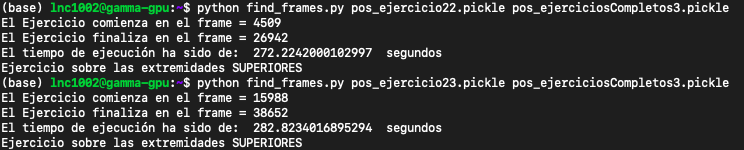

In [2]:
from IPython.display import Image

Image("img/EjecucionEj22_23.png")

La solución obtenida se va a mostrar con una tabla que contiene los siguientes valores:
- <b>Seq. encontrada</b>: es la secuencia tal cual la encuentra nuestra función de búsqueda
- <b>Seq. equivalente</b>: Secuencia equivalente en el conjunto real tras aplicar una regla de tres ( 168754(longitud unidimensional recortada) es a 6027(longitud secuencia real) como (valor de la posición, ej 6384) es a X)
- <b>Seq. equiv + error</b>: Se le añade una tasa de error por la perdida de longitud en las alineaciones DTW(Esto se ha explicado en cuadernos previos). Esta tasa de error se calcula sacando el 10% del valor de la secuencia equivalente. En las posciones de inicio se resta este valor y en las de final se suma. De esta manera se consigue ampliar un poco la secuencia e intentar compensar la pérdida de datos.
- <b>Seq. real</b>: Es la secuencia real, la que se debería encontrar para lograr una precisión al 100%
- <b>Seg. obtenido</b>: Es el segundo del vídeo al que corresponde la secuencia equivalente más el error encontrada. Para ello se ha realizado una nueva regla de tres. Si el número total de frames, 6027 equivalen a 201 segundos, la secuencia equivalente con el error, por ejemplo 205, equivaldrá a x.
- <b>Seg. real</b>: Es el segundo real del vídeo al que pertenece el inicio y final de la secuencia.

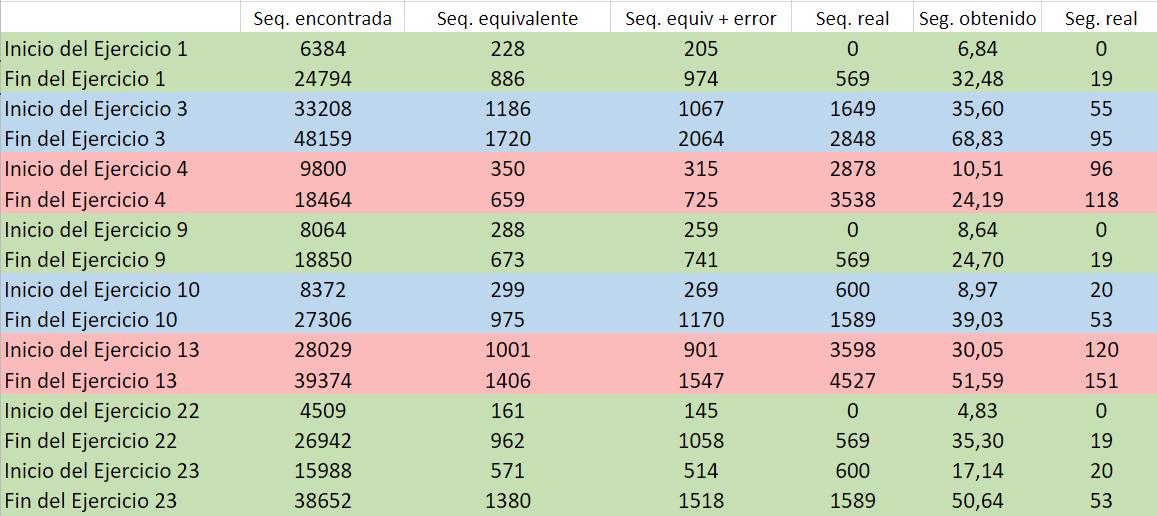

In [1]:
Image("img/Pruebas_Video_Completo3.png")

<div class="alert alert-block alert-warning">
    <b>Solución: </b> Según la tabla anteriore se pueden observar las siguientes clasificaciones:
    
- <b>Verde:</b>: Se marcan en color verde aquellas secuencias que se aceptan como solución válida. Para que una secuencia se aceptada como válida debe contener prácticamente en su totalidad la secuencia esperada. Puede contener parte de otras secuencias pero no demasiado.
- <b>Azul:</b>: Se marcan en color azul las secuencias encontradas que no son del todo idóneas pero que tampoco se aleja tanto del resultado esperado
- <b>Rojo:</b>: Se marcan en color rojo las secuencias que no se parecen en nada al valor esperado
    
    
<b>Conclusión: </b> Se puede concluir que los resultados arrojados son alentadores, de un total de ocho ejercicios analizados se han procesado correctamente cuatro (50%) y de los no tan bien clasificados, la mitad de ellos son "aceptables". Por lo que el 75% de los resultados son aceptables
</div>

## Pruebas sobre el primer vídeo

- Duración en minutos: 2:30 minutos
- Duración en segundos: 250 segundos
- Número de frames: 4500 frames totales

In [5]:
pos_1=extrat_pickle("pos_ejercicio1.pickle");pos_3=extrat_pickle("pos_ejercicio3.pickle")
pos_4=extrat_pickle("pos_ejercicio4.pickle");pos_9=extrat_pickle("pos_ejercicio9.pickle")
pos_10=extrat_pickle("pos_ejercicio10.pickle");pos_13=extrat_pickle("pos_ejercicio13.pickle")
pos_23=extrat_pickle("pos_ejercicio23.pickle")

pos_total = extrat_pickle("pos_ejerciciosCompletos4.pickle")

print("Longitud del ejercicio completo: ",len(pos_total))

Longitud del ejercicio completo:  4500


In [6]:
pos_ej1=elimina(np.array(pos_1).flatten()); pos_ej3=elimina(np.array(pos_3).flatten())
pos_ej4=elimina(np.array(pos_4).flatten()); pos_ej9=elimina(np.array(pos_9).flatten())
pos_ej10=elimina(np.array(pos_10).flatten()); pos_ej13=elimina(np.array(pos_13).flatten())
pos_ej23=elimina(np.array(pos_23).flatten())       
pos_ej_total = elimina(np.array(pos_total).flatten())

print("Longitud del ejercicio completo: ",len(pos_ej_total))

Longitud del ejercicio completo:  189000


In [7]:
pos_ej_total = pos_ej_total[~np.isnan(pos_ej_total)]

## Recortamos los frames dejando aproximadamente el 67%

In [8]:
pos_c1=cutFrames(pos_1); pos_c3=cutFrames(pos_3); pos_c4=cutFrames(pos_4); pos_c9=cutFrames(pos_9)
pos_c10=cutFrames(pos_10); pos_c13=cutFrames(pos_13);pos_c23=cutFrames(pos_23)   
pos_total=cutFrames(pos_ej_total)

pos_ej1=np.array(pos_c1).flatten(); pos_ej3=np.array(pos_c3).flatten(); pos_ej4=np.array(pos_c4).flatten()
pos_ej9=np.array(pos_c9).flatten(); pos_ej10=np.array(pos_c10).flatten(); pos_ej13=np.array(pos_c13).flatten()
pos_ej23=np.array(pos_c23).flatten()
pos_ej_total = np.array(pos_total).flatten()

print("Ejercicio completo: ",len(pos_ej_total))

Ejercicio completo:  126000


In [9]:
import time

inicio = time.time()

calcule(1,pos_ej1);calcule(3,pos_ej3);calcule(4,pos_ej4);calcule(9,pos_ej9);calcule(10,pos_ej10);
calcule(13,pos_ej13);calcule(23,pos_ej23);

fin = time.time()

print("El tiempo trascurrido para la localización de ocho ejercicios ha sido: ",fin-inicio)

El Ejercicio 1 comienza en el frame = 10670
El Ejercicio 1 finaliza en el frame = 29322 

El Ejercicio 3 comienza en el frame = 22514
El Ejercicio 3 finaliza en el frame = 37603 

El Ejercicio 4 comienza en el frame = 8064
El Ejercicio 4 finaliza en el frame = 17002 

El Ejercicio 9 comienza en el frame = 3529
El Ejercicio 9 finaliza en el frame = 14363 

El Ejercicio 10 comienza en el frame = 1176
El Ejercicio 10 finaliza en el frame = 20530 

El Ejercicio 13 comienza en el frame = 109257
El Ejercicio 13 finaliza en el frame = 120595 

El Ejercicio 23 comienza en el frame = 7840
El Ejercicio 23 finaliza en el frame = 29983 

El tiempo trascurrido para la localización de ocho ejercicios ha sido:  222.86396145820618


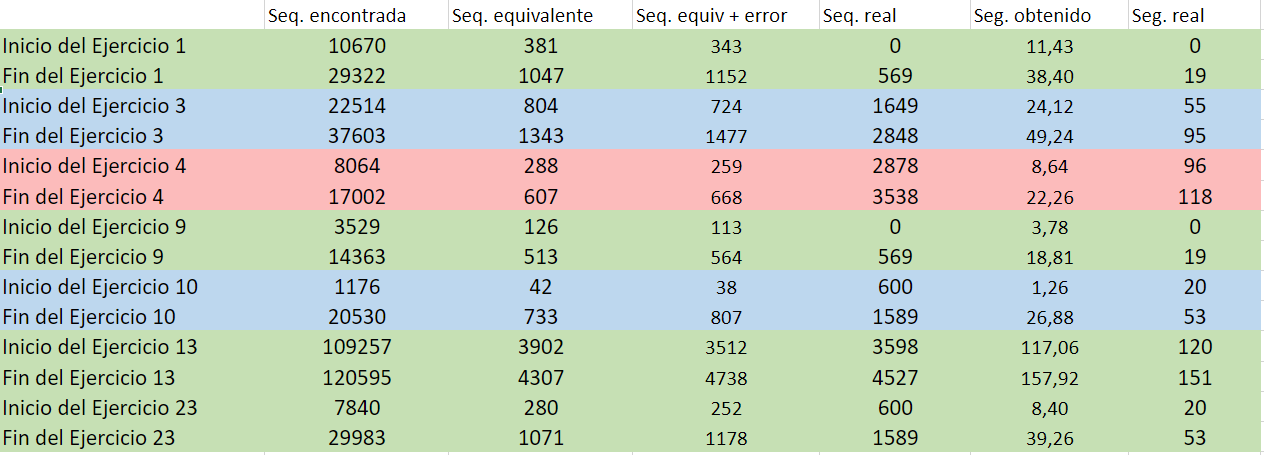

In [3]:
Image("img/Pruebas_Video_Completo4.png")

<div class="alert alert-block alert-warning">
    <b>Solución: </b> Según la tabla anteriore se pueden observar que de un total de siete ejercicios, cuatro son clasificados correctamente (57%) y de los restantes solo uno es clasificado verdaderamente mal, por lo que el 85,7% de los datos tienen una clasificación aceptable.
    
<b>Conclusión: </b> Se puede concluir que mediante esta técnica se pueden encontrar secuencias baste favorables y en unos tiempos bastante aceptables.
</div>